# Exploratory data analysis for digital marketing with Seaborn

## What is EDA, and why is it important?
Exploratory Data Analysis (EDA) is usually the first step when you have data in hand and want to analyze it. In EDA, there is no hypothesis and no model. You are finding patterns and truth from the data.
EDA is crucial for data science projects because it can: 
1. Help you gain intuition about the data.
2. Make comparisons between distributions.
3. Check if the data is on the scale you expect.
4. Find out where data is missing or if there are outliers.
5. Summarize data, calculate the mean, min, max, and variance.

The basic tools of EDA are plots, graphs, and summary statistics.

## Why Seaborn?
Seaborn is a library for making statistical graphics in Python. It builds up on top of matplotlib and integrates closely with pandas data structures. It is the equivalent of ggplot2 as of R for Python.

## About the data
In the article, we are going to use Seaborn to do EDA on a simulated digital marketing data. It is the first exercise from the book Doing Data Science by Dr. Rachel Schutt and Dr. Cathy O’Neil.

Each CSV file in the dds_ch2_nyt folder represents one day’s worth of ads shown and clicks recorded on the New York Times home page in May 2012. Each row represents a single user. There are five columns: age, gender(0=female, 1=male), number of impressions, number of clicks and logged-in.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('nyt1.csv')
df.shape

(458441, 5)

In [3]:
df.head()

,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1


In [4]:
df.describe()

,Age,Gender,Impressions,Clicks,Signed_In
count,458441.000000,458441.000000,458441.000000,458441.000000,458441.000000
mean,29.482551,0.367037,5.007316,0.092594,0.700930
std,23.607034,0.481997,2.239349,0.309973,0.457851
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000,0.000000
50%,31.000000,0.000000,5.000000,0.000000,1.000000
75%,48.000000,1.000000,6.000000,0.000000,1.000000
max,108.000000,1.000000,20.000000,4.000000,1.000000


From the above stats, we know there are no missing values for the features. The age group is in the range of 0 to 108. Let’s group the age to seven bins.

In [5]:
bins = [0,18,25,35,45,55,65,110]
labels = ['<18','18-24','25-34','35-44','45-54','55-64','65+']
df['age_group'] = pd.cut(df.Age, bins, labels = labels, include_lowest = True)
df.head()

,Age,Gender,Impressions,Clicks,Signed_In,age_group
0,36,0,3,0,1,35-44
1,73,1,3,0,1,65+
2,30,0,3,0,1,25-34
3,49,1,3,0,1,45-54
4,47,1,11,0,1,45-54


### How Many people are in each age group by Gender?

In [8]:
import warnings 
import seaborn as sns
warnings.filterwarnings('ignore')
# Set default theme and figure size
sns.set_theme()
sns.set(rc={'figure.figsize':(14,6)})

<AxesSubplot:xlabel='age_group', ylabel='count'>

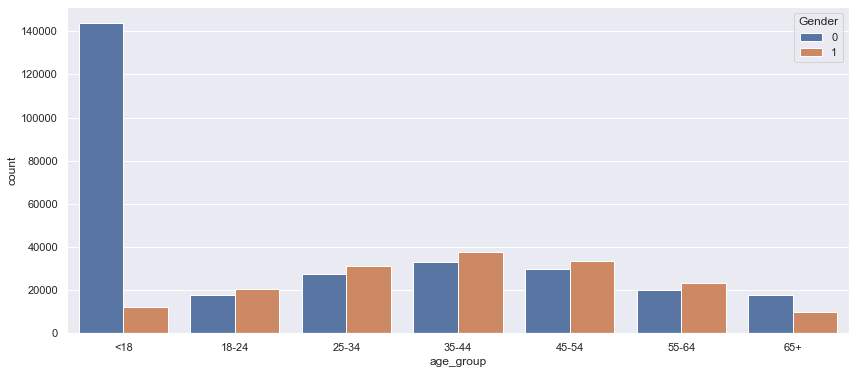

In [9]:
# How many people in each age group 
sns.countplot(x='age_group', hue='Gender', data=df)

We find that most users are females below 18 years old. Among the age group 18 to 64, male users are more than females. But for users who are older than 65 and younger than 18, females users outnumber male users.

Here, users mean the ones who read the New York Times articles. We are more interested in whether they click on the Ads.

From the stats image, we know that users didn’t click or click up to 4 times.

### Let’s find out which group has more clicks among all the age groups.


<AxesSubplot:xlabel='Clicks', ylabel='count'>

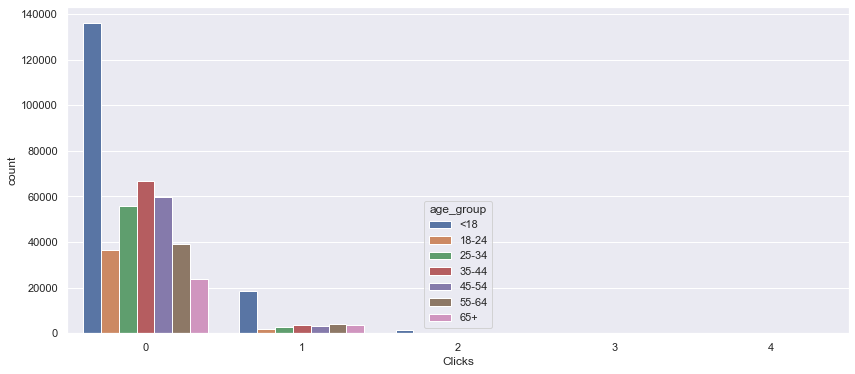

In [10]:
sns.countplot(x='Clicks', hue='age_group', data=df)

So most people didn’t click on the ads, youngsters below 18 click more than all other groups, maybe this group is the target group for ad companies?

The next question is: will anyone click on an ad where there is no impression? I believe not, we can verify it by:

In [11]:
# Will anyone click on an ad where there is no impression?
df[(df['Clicks']>0) & (df['Impressions']==0)].shape[0]

0

The output is 0. Cool, this is what we expected. Only when there is an impression (ad shown) will users click on it.

Let’s see how the ads are promoted, aka, what is the distribution of the impressions by age group.

### We can use a histogram to show distributions of datasets.

<AxesSubplot:xlabel='Impressions', ylabel='Count'>

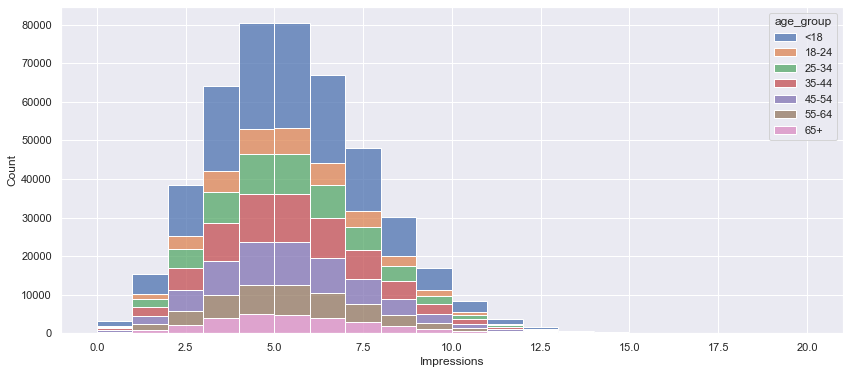

In [12]:
sns.histplot(df, x='Impressions', hue='age_group', stat='count', binwidth=1, multiple='stack')

Most users have been shown 0 to 13 ads, and the most possible frequency is five times. There are not many differences between different age groups.

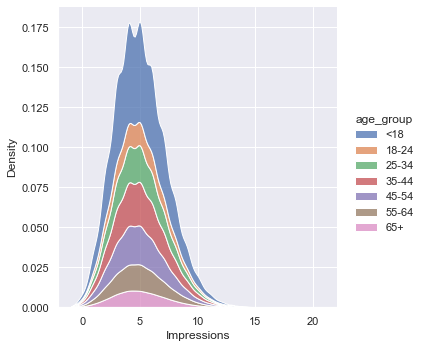

In [13]:
# Use kernel density estimation to see the above distribution
sns.displot(df, x='Impressions', hue='age_group', kind='kde', bw_adjust=2, multiple='stack')

### Check for Outliers with Boxplots

<AxesSubplot:xlabel='age_group', ylabel='Impressions'>

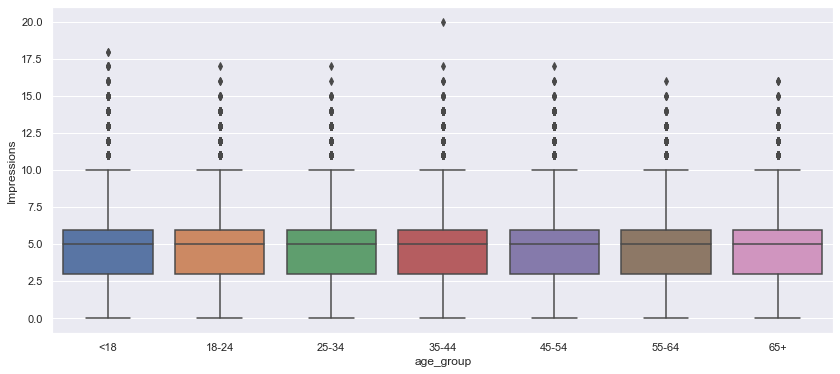

In [14]:
#Let’s use a boxplot to see if there are any outliers.
sns.boxplot(y=df['Impressions'], x=df['age_group'])

We can confirm that for each age group, the impression distribution is similar, while occasionally, ads are shown 20 times to the age group 35 to 44.

Now, we have explored impressions and clicks. Let’s combine them, see how the click-through rate goes.

Let’s create a new variable, “CTR.”

<AxesSubplot:xlabel='age_group', ylabel='CTR'>

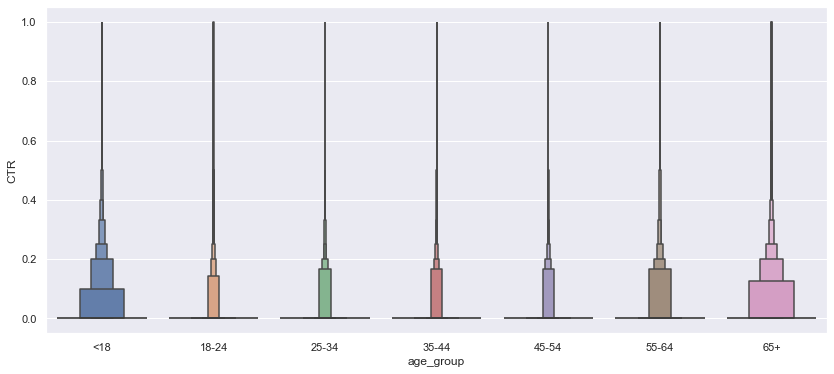

In [16]:
df['CTR'] = round(df['Clicks']/df['Impressions'], 5)
# Plot the distribution of Click-through rate by age group
# Since the dataset is quite large, using a boxplot cannot tell us much information. We’ll use a boxenplot instead. 
# Boxenplots are particularly good at summarizing the distribution of large datasets.
sns.boxenplot(x=df['age_group'], y=df['CTR'])

We can find out that 50% of users younger than 18 have a click-through rate lower than 10%, while for the age group between 18 to 65, it’s below approximately 18%. 75% of all users have a CTR of less than 20%.

### How many people have a 0 Click-through rate?
Let’s group all users by their click behaviours.

In [18]:
bins = [-1, 0, 0.1, 0.2, 0.4, 1]
labels = ['0', '<10%', '10%-20%', '20%-40%', '>40%']
df['CTR_group'] = pd.cut(df.CTR, bins, labels = labels,include_lowest = True)
df.CTR_group.value_counts(normalize=True, sort=True)

0          0.912516
10%-20%    0.054654
20%-40%    0.023328
<10%       0.004996
>40%       0.004506
Name: CTR_group, dtype: float64

So, 91.2% of users have never clicked on any ads, 5.4% have a 10%–20% CTR and 2.3% have a 20%–40% CTR.

We may want to dig more into the 7.7% of users who have a CTR between 10% and 20% and promote ads more suitable for them.

### Let’s explore more on the users who clicked on the ads. We’ll create a subset for them.

In [19]:
df_Clicked = df[df['CTR'] > 0]
df_Clicked.head()
df_Clicked.shape

(39838, 8)

In [20]:
df_Clicked.age_group.value_counts(normalize=True)

<18      0.505723
55-64    0.106757
65+      0.099152
35-44    0.090190
45-54    0.079397
25-34    0.073297
18-24    0.045484
Name: age_group, dtype: float64

Among all users who clicked on the ads, 50% of them are below 18 years old.

<AxesSubplot:xlabel='age_group', ylabel='CTR'>

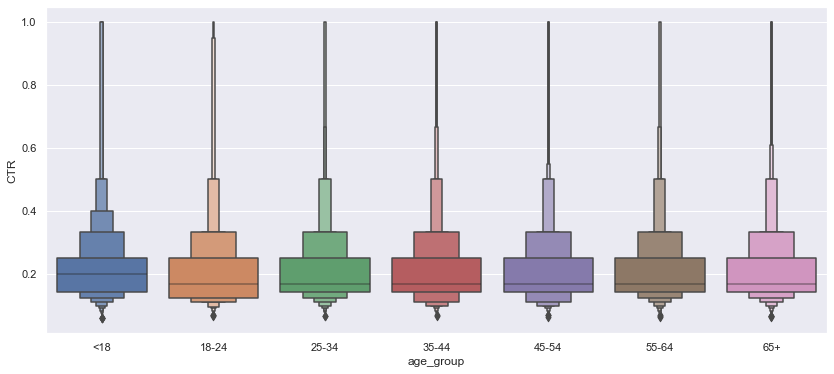

In [21]:
#Click-through rate distribution by age groups among all users who clicked 
sns.boxenplot(x=df_Clicked['age_group'], y=df_Clicked['CTR'])

Among the users who clicked on the ads, half of the ones below 18 years old have a click-through rate of more than 20%.

<AxesSubplot:xlabel='age_group', ylabel='count'>

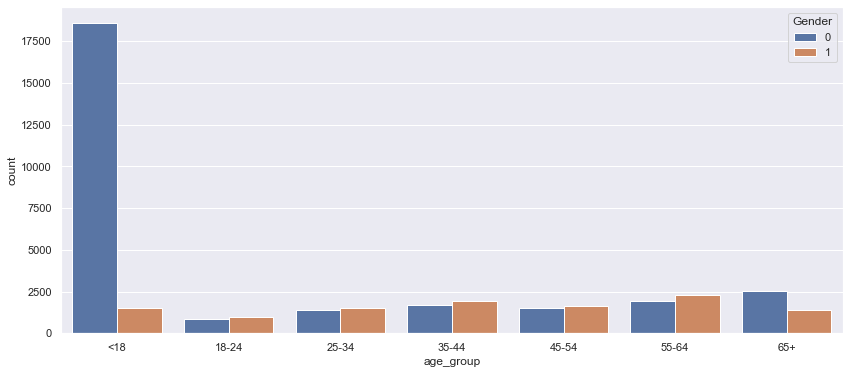

In [22]:
#Number of people in each age group among clicked users by gender
sns.countplot(x='age_group', hue='Gender', data=df_Clicked)

<AxesSubplot:xlabel='age_group', ylabel='count'>

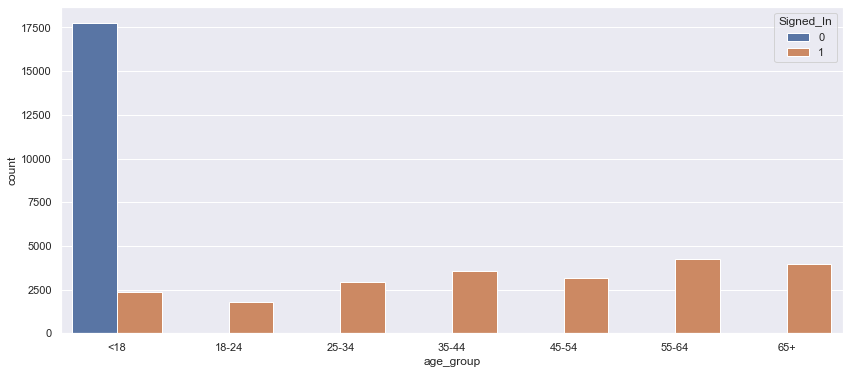

In [23]:
#Number of people in each age group among clicked users by sign_in status
sns.countplot(x='age_group', hue='Signed_In', data=df_Clicked)

Female users under 18 years old consist the largest proportion among the users who clicked on ads. 
The youngsters also prefer not to sign in, while users in other age groups tend to sign in before clicking on ads.

<AxesSubplot:xlabel='CTR_group', ylabel='count'>

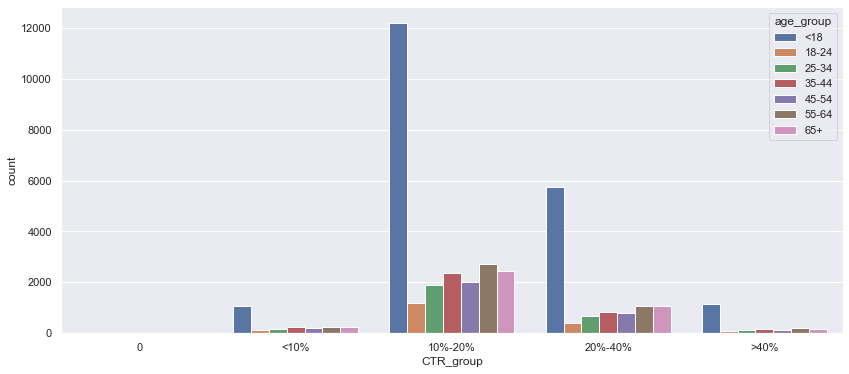

In [24]:
#Distribution of age_group in CTR groups 
sns.countplot(x='CTR_group', hue='age_group', data=df_Clicked)

From the above image, we can conclude that among all users who click on the ads, users below 18 years tend to have a higher click-through rate. The largest amount of click-through rate falls into the 10%-20% group.

#### Let’s create another subset for these people.

<AxesSubplot:xlabel='Impressions', ylabel='Count'>

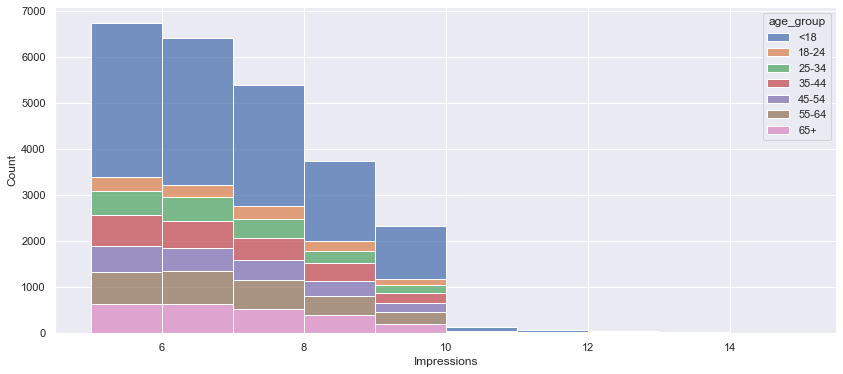

In [25]:
df_Clicked1020 = df_Clicked[df_Clicked['CTR_group'] == '10%-20%']
# Plot the distribution of impressions by age group 
sns.histplot(df_Clicked1020, x='Impressions', hue='age_group', binwidth=1, stat='count', multiple='stack')

We can see that most people have more than 5 times impressions; hence, more appearances of ads are crucial to get a better CTR.

## What did we interpret from the data?

 - 91.3% of users reading New York Times don’t click on ads at all.
 - Users younger than 18 years old are the target audience of the ad companies who promote ads in New York Times magazine. They consist of 34% of all users, and 50% of all clicked users. They are also the group that responses to the ads the most. However, the ads are not shown dissimilarly to different age groups. One advice is to promote more ads that fit young females’ tastes in New York Times.
 - The 7.7 % of users with a click-through rate between 10% and 20% are those whom ad companies need to pay more attention to. 49% of them are under 18 years old, 70% are females, and 56.8% tend to sign in to New York Times.
 - The recommended impression frequency is between 5 to 10 for achieving a higher click-through rate.